#**Project Title: Email Spam Detection Using Cuda And OpenMP**

#**Submitted by:**
i.	Naveed ul Hassan, SP22-BCS-197

ii.	Uzair Bin Ali Qamar, SP22-BCS-066

#**Submitted to**
Mr. Ehtisham ul Haque


## Introduction

With the rapid growth of email communication, spam emails are becoming increasingly sophisticated. Traditional sequential spam detection techniques face limitations in performance and scalability. Parallel and Distributed Computing (PDC) provides powerful tools to address these challenges.

This project applies:

**CUDA :** for massive parallel keyword-based spam detection on the GPU  
**OpenMP :** for parallel feature-based analysis on the CPU  

The goal is to build a dynamic, scalable, and explainable spam detection system suitable for academic and real-world scenarios.

**Input :** User uploads a .txt file or pastes email text into the system.

**Output :** System classifies the email as SPAM or NOT SPAM and displays the decision with detected keywords and features as references.

**Architecture diagram :** Below is the architecture diagram of the proposed email spam detection system integrating CUDA-based GPU keyword analysis and OpenMP-based CPU feature extraction.


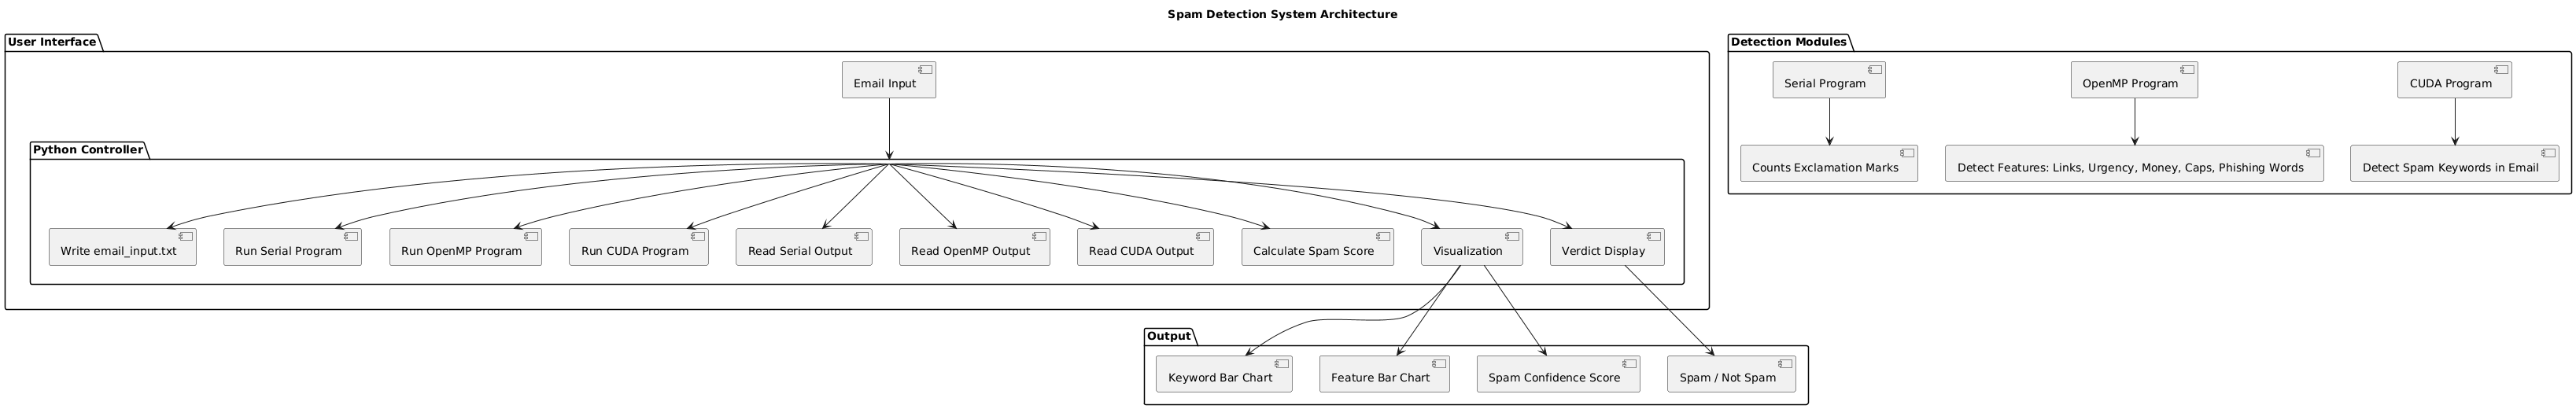

**1. Problem Analysis & Architecture Design**

We first define the input data, such as emails or text files, and the expected output, which is the spam classification and confidence score. The problem domain focuses on parallel spam detection, leveraging both CPU and GPU resources for faster processing. We then design an architecture showing how OpenMP handles CPU-based feature detection and CUDA accelerates keyword matching on the GPU, ensuring efficient intra-node parallelism.

**2. Implementation using CUDA + OpenMP**

The task is divided into smaller subtasks that are handled concurrently using OpenMP threads on the CPU, such as feature detection in the email. Within each CPU thread or where appropriate, CUDA kernels are used on the GPU for massive parallel processing tasks like keyword matching. This hybrid approach leverages CPU multithreading with OpenMP and GPU acceleration with CUDA to achieve efficient parallel spam detection.

**3. Performance Evaluation & Report**

We measure key metrics such as speedup, GPU utilization, CPU thread efficiency, and scalability across different email sizes and workloads. Performance is compared against a serial CPU-only implementation to highlight the benefits of parallelization using OpenMP for CPU features and CUDA for GPU keyword matching. Results are presented in graphs, charts, and tables, providing a clear visual analysis of efficiency, bottlenecks, and overall system performance.

**4. Deliverables**

The project includes well-documented source code with comments explaining each module and function. A comprehensive project report is prepared in both PDF and printed format, covering problem analysis, architecture, implementation, and performance evaluation. Finally, simulation and performance graphs are included to demonstrate speedup, scalability, and the effectiveness of the parallel spam detection system.

**5. System Setup, Config, Check**

In [1]:
import os
import subprocess
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Checking GPU availability...")
!nvidia-smi
print("System initialized successfully.")


Checking GPU availability...
Fri Dec 19 05:00:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+------------------

**6. Populating Spam Keywords**




In [2]:
# Generate 200 base spam keywords
base_keywords = [
    "free", "winner", "win", "prize", "money", "urgent", "verify", "account",
    "bank", "credit", "loan", "offer", "limited", "exclusive", "click",
    "bitcoin", "crypto", "cash", "investment", "guaranteed",
    "bonus", "gift", "reward", "promotion", "deal", "sale", "subscribe",
    "urgentupdate", "password", "login", "secure", "lottery", "cashback",
    "claim", "urgentnotice", "check", "alert", "exclusiveoffer", "voucher",
    "redeem", "winnerannouncement", "instant", "profit", "income", "moneyback",
    "refund", "opportunity", "double", "triple", "limitedtime", "hotdeal",
    "riskfree", "easycash", "fastcash", "applynow", "getpaid", "earn", "rich",
    "success", "freemoney", "urgentaction", "important", "deadline", "winbig",
    "bonuspoints", "giftcard", "rewards", "exclusiveaccess", "privilege",
    "offerexpires", "specialoffer", "accessnow", "urgentresponse", "clickhere",
    "freegift", "cashprize", "limitedslots", "instantwin", "rewardpoints",
    "payday", "investmentopportunity", "creditbonus", "bitcoinreward", "cryptogift",
    "moneytransfer", "claimnow", "vipoffer", "urgentrequest", "verifyaccount",
    "bankbonus", "loanapproval", "creditcheck", "exclusivebonus", "urgentupdate",
    "prizerewards", "cashoffer", "freecredits", "limitedaccess", "hotbonus",
    "fastloan", "limiteddeal", "earncash", "urgentmessage", "offerinside",
    "instantbonus", "verifyinformation", "specialreward", "clicknow", "freereward",
    "winnerbonus", "urgentemail", "cashreward", "freebitcoin", "bonuscash",
    "prizeclaim", "exclusivecash", "limitedvoucher", "verifyidentity", "urgentclaim",
    "fastreward", "specialdeal", "cashbonus", "moneygift", "freeloan", "quickreward",
    "instantcash", "vipbonus", "exclusiveoffer2", "cryptocash", "urgentcredit",
    "freeinvestment", "topbonus", "limitedreward", "redeembonus", "prizewinner",
    "fastmoney", "specialaccess", "earnreward", "urgentreward", "bonusdeal",
    "exclusiveprize", "freemoney2", "cashgift", "vipcash", "bonusoffer", "limitedbonus",
    "urgentbonus", "freevoucher", "quickcash", "claimreward", "instantoffer",
    "hotbonus2", "exclusivecredits", "specialcash", "freecredit", "moneybonus",
    "urgentvip", "winnergift", "fastbonus", "cashoffer2", "bonuspoints2",
    "redeemcash", "exclusiveincome", "instantwin2", "claimbonus", "freebitcoin2",
    "cryptoreward", "limitedcash", "fastincome", "urgentpayment", "topcash",
    "specialbonus", "prizefund", "freeincome", "cashvoucher", "bonuscredits",
    "exclusivefund", "urgentfund", "instantcredits", "freemoney3", "vipreward",
    "quickincome", "hotdeal2", "limitedfund", "rewardfund", "fastfund", "claimfund",
    "bonusfund", "exclusivefund2", "urgentdeal", "topreward", "specialfund",
    "cashfund", "freereward2", "winnerfund", "fastreward2", "bonusreward",
    "instantfund", "cryptofund", "verifyfund", "urgentbonus2", "limitedreward2",
    "exclusivebonus2", "cashreward2", "topbonus2", "fastbonus2", "freevoucher2"
]

# Trim or extend to exactly 200
base_keywords = base_keywords[:200]

with open("spam_keywords.txt", "w") as f:
    for word in base_keywords:
        f.write(word + "\n")

print("spam_keywords.txt created with 200 keywords")


spam_keywords.txt created with 200 keywords


**7. Spam_detector.cu, CUDA for massive parallel keyword-based spam detection on the GPU**


In [3]:
%%writefile spam_detector.cu
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <cuda_runtime.h>

#define MAX_KEYWORDS 1000
#define KEYWORD_LEN 32
#define MAX_EMAIL 50000  // increased for large emails

/* ======================================================
   CUDA KERNEL
   Each thread checks ONE keyword against the email text
   ====================================================== */
__global__ void keyword_kernel(
    char* d_text,
    int text_len,
    char* d_keywords,
    int* d_results,
    int num_keywords
) {
    int tid = blockIdx.x * blockDim.x + threadIdx.x;

    if (tid < num_keywords) {
        char* keyword = &d_keywords[tid * KEYWORD_LEN];
        int k = 0;
        // Find keyword length safely
        while (k < KEYWORD_LEN && keyword[k] != '\0') k++;

        int count = 0;
        for (int i = 0; i <= text_len - k; i++) {
            int j;
            for (j = 0; j < k; j++) {
                if (d_text[i + j] != keyword[j])
                    break;
            }
            if (j == k)
                count++;
        }
        d_results[tid] = count;
    }
}

/* ======================================================
   HOST FUNCTION
   Manages memory + kernel execution
   ====================================================== */
void run_cuda(
    char* email,
    int email_len,
    char* keywords,
    int num_keywords
) {
    char *d_text, *d_keywords;
    int *d_results;

    cudaMalloc(&d_text, email_len + 1);
    cudaMalloc(&d_keywords, num_keywords * KEYWORD_LEN);
    cudaMalloc(&d_results, num_keywords * sizeof(int));

    cudaMemcpy(d_text, email, email_len + 1, cudaMemcpyHostToDevice);
    cudaMemcpy(d_keywords, keywords, num_keywords * KEYWORD_LEN, cudaMemcpyHostToDevice);

    int threads = 256;
    int blocks = (num_keywords + threads - 1) / threads;

    /* =========================
       CUDA KERNEL TIMING START
       ========================= */
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);
    cudaEventRecord(start);

    keyword_kernel<<<blocks, threads>>>(d_text, email_len, d_keywords, d_results, num_keywords);
    cudaDeviceSynchronize();

    cudaEventRecord(stop);
    cudaEventSynchronize(stop);
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);
    printf("CUDA kernel time: %.3f ms\n", milliseconds);
    /* =========================
       CUDA KERNEL TIMING END
       ========================= */

    int* h_results = (int*)malloc(num_keywords * sizeof(int));
    cudaMemcpy(h_results, d_results, num_keywords * sizeof(int), cudaMemcpyDeviceToHost);

    FILE* out = fopen("cuda_output.txt", "w");
    for (int i = 0; i < num_keywords; i++) {
        if (h_results[i] > 0)
            fprintf(out, "%s:%d\n", &keywords[i * KEYWORD_LEN], h_results[i]);
    }
    fclose(out);

    cudaFree(d_text);
    cudaFree(d_keywords);
    cudaFree(d_results);
    free(h_results);
}

/* ======================================================
   MAIN FUNCTION
   Loads files and calls CUDA host function
   ====================================================== */
int main() {
    // Read entire email
    FILE* f = fopen("email_input.txt", "r");
    if (!f) {
        printf("Error: email_input.txt not found\n");
        return 1;
    }

    char email[MAX_EMAIL] = {0};
    int email_len = fread(email, 1, sizeof(email)-1, f);
    email[email_len] = '\0';
    fclose(f);

    // Load keywords
    FILE* kf = fopen("spam_keywords.txt", "r");
    if (!kf) {
        printf("Error: spam_keywords.txt not found\n");
        return 1;
    }

    char* keywords = (char*)calloc(MAX_KEYWORDS * KEYWORD_LEN, 1);
    int count = 0;
    char buf[128];

    while (fgets(buf, sizeof(buf), kf) && count < MAX_KEYWORDS) {
        buf[strcspn(buf, "\n")] = 0; // remove newline
        strncpy(&keywords[count * KEYWORD_LEN], buf, KEYWORD_LEN-1);
        keywords[count * KEYWORD_LEN + KEYWORD_LEN-1] = '\0';
        count++;
    }
    fclose(kf);

    // Run CUDA kernel
    run_cuda(email, email_len, keywords, count);

    free(keywords);
    return 0;
}


Writing spam_detector.cu


In [4]:
!nvcc -arch=sm_75 spam_detector.cu -o spam_cuda

**8. feature_detector.c, OpenMP : for parallel feature-based analysis on the CPU**

In [5]:
%%writefile feature_detector.c
#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <omp.h>
#include <ctype.h>

#define MAX_EMAIL 50000

int main() {
    FILE* f = fopen("email_input.txt", "r");
    if (!f) {
        printf("Error: email_input.txt not found\n");
        return 1;
    }

    char email[MAX_EMAIL];
    int email_len = fread(email, 1, sizeof(email)-1, f);
    email[email_len] = '\0';
    fclose(f);

    int link = 0, urgency = 0, money = 0, punct = 0;
    int caps = 0, attachments = 0, phishing_words = 0;

    const char* suspicious_words[] = {
        "password", "login", "bank", "account", "verify", "credit", "urgent", "win", "prize", "lottery"
    };
    int num_suspicious = sizeof(suspicious_words)/sizeof(suspicious_words[0]);

    double start = omp_get_wtime();

    #pragma omp parallel sections num_threads(7) shared(link, urgency, money, punct, caps, attachments, phishing_words)
    {
        #pragma omp section
        { if (strstr(email, "http") || strstr(email, "www")) link = 1; }

        #pragma omp section
        { if (strstr(email, "urgent") || strstr(email, "immediately") || strstr(email, "asap") || strstr(email, "now")) urgency = 1; }

        #pragma omp section
        { if (strchr(email, '$') || strstr(email, "USD") || strstr(email, "€")) money = 1; }

        #pragma omp section
        {
            int c = 0;
            for (int i = 0; email[i]; i++)
                if (email[i] == '!' || email[i] == '?') c++;
            if (c > 3) punct = 1;
        }

        #pragma omp section
        {
            int cap_count = 0;
            for (int i = 0; email[i]; i++)
                if (isupper(email[i])) cap_count++;
            if ((double)cap_count / email_len > 0.3) caps = 1;
        }

        #pragma omp section
        {
            if (strstr(email, ".exe") || strstr(email, ".zip") || strstr(email, ".rar") || strstr(email, "attachment"))
                attachments = 1;
        }

        #pragma omp section
        {
            int count_words = 0;
            for (int i = 0; i < num_suspicious; i++)
                if (strstr(email, suspicious_words[i])) count_words++;
            if (count_words > 0) phishing_words = 1;
        }
    }

    double end = omp_get_wtime();
    double omp_time = (end - start) * 1000;

    FILE* out = fopen("omp_output.txt", "w");
    fprintf(out,
            "link:%d\nurgency:%d\nmoney:%d\npunct:%d\ncaps:%d\nattachments:%d\nphishing_words:%d\n",
            link, urgency, money, punct, caps, attachments, phishing_words);
    fclose(out);

    printf("OpenMP detection completed in %.3f ms\n", omp_time);

    return 0;
}


Writing feature_detector.c


In [6]:
!gcc -fopenmp feature_detector.c -o spam_omp

**9. serial_detector.c**

In [7]:
%%writefile serial_detector.c
#include <stdio.h>
#include <string.h>
#include <ctype.h>

#define MAX_EMAIL 50000

int main() {

    /* ===============================
       STEP 1: Read email from file
       =============================== */
    FILE* f = fopen("email_input.txt", "r");
    if (!f) {
        printf("Email file not found\n");
        return 1;
    }

    char email[MAX_EMAIL];
    int email_len = fread(email, 1, MAX_EMAIL - 1, f);
    email[email_len] = '\0';
    fclose(f);

    /* ===============================
       STEP 2: Initialize spam features
       =============================== */
    int exclamations = 0;
    int link = 0;
    int urgency = 0;
    int money = 0;
    int caps = 0;
    int phishing_words = 0;

    /* ===============================
       STEP 3: Count exclamation marks
       =============================== */
    for (int i = 0; email[i]; i++) {
        if (email[i] == '!')
            exclamations++;
    }

    /* ===============================
       STEP 4: Detect links
       =============================== */
    if (strstr(email, "http") || strstr(email, "www"))
        link = 1;

    /* ===============================
       STEP 5: Detect urgency words
       =============================== */
    if (strstr(email, "urgent") || strstr(email, "now") || strstr(email, "immediately"))
        urgency = 1;

    /* ===============================
       STEP 6: Detect money symbols
       =============================== */
    if (strchr(email, '$') || strstr(email, "USD") || strstr(email, "€"))
        money = 1;

    /* ===============================
       STEP 7: Detect excessive capital letters
       =============================== */
    int cap_count = 0;
    for (int i = 0; email[i]; i++) {
        if (isupper(email[i]))
            cap_count++;
    }
    if ((double)cap_count / email_len > 0.3)
        caps = 1;

    /* ===============================
       STEP 8: Detect phishing words
       =============================== */
    const char* phishing[] = {
        "password", "login", "bank", "verify", "account", "credit"
    };
    int n = sizeof(phishing) / sizeof(phishing[0]);

    for (int i = 0; i < n; i++) {
        if (strstr(email, phishing[i])) {
            phishing_words = 1;
            break;
        }
    }

    /* ===============================
       STEP 9: Write results to file
       =============================== */
    FILE* out = fopen("serial_output.txt", "w");
    fprintf(out,
        "exclamations:%d\nlink:%d\nurgency:%d\nmoney:%d\ncaps:%d\nphishing_words:%d\n",
        exclamations, link, urgency, money, caps, phishing_words);
    fclose(out);

    return 0;
}


Writing serial_detector.c


In [8]:
!gcc serial_detector.c -o spam_serial

**10 Python Code portion**

In [9]:
import subprocess
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

def run_system():
    email_count = 1

    while True:
        print("\n==============================")
        print("EMAIL SPAM DETECTION SYSTEM")
        print("1. Paste email text")
        print("2. Upload email (.txt file)")
        print("3. Exit")
        print("==============================")

        choice = input("Select option (1/2/3): ").strip()

        if choice == "3":
            print("\nSystem terminated.")
            break

        # -------------------------
        # Get Email Input
        # -------------------------
        if choice == "1":
            print("\nPaste email content below:")
            email = input()
        elif choice == "2":
            print("\nUpload a .txt email file")
            from google.colab import files   # Only if using Colab
            uploaded = files.upload()
            if not uploaded:
                print("No file uploaded.")
                continue
            filename = list(uploaded.keys())[0]
            with open(filename, "r") as f:
                email = f.read()
        else:
            print("Invalid option. Try again.")
            continue

        # Write email to input file
        with open("email_input.txt", "w") as f:
            f.write(email)

        # -------------------------
        # Run CUDA
        # -------------------------
        result = subprocess.run(["./spam_cuda"], capture_output=True, text=True)
        cuda_time = 0.0
        for line in result.stdout.splitlines():
            if "CUDA kernel time" in line:
                cuda_time = float(line.split(":")[1].strip().split()[0])
                break

        # -------------------------
        # Run OpenMP
        # -------------------------
        t_omp_start = time.time()
        subprocess.run(["./spam_omp"], stdout=subprocess.DEVNULL)
        omp_time = (time.time() - t_omp_start) * 1000

        # -------------------------
        # Run Serial
        # -------------------------
        t_serial_start = time.time()
        subprocess.run(["./spam_serial"], stdout=subprocess.DEVNULL)
        serial_time = (time.time() - t_serial_start) * 1000

        # -------------------------
        # Read CUDA Results
        # -------------------------
        keywords = {}
        if os.path.exists("cuda_output.txt"):
            with open("cuda_output.txt") as f:
                for line in f:
                    k, v = line.strip().split(":")
                    keywords[k] = int(v)

        # -------------------------
        # Read OpenMP Results
        # -------------------------
        features = {}
        if os.path.exists("omp_output.txt"):
            with open("omp_output.txt") as f:
                for line in f:
                    k, v = line.strip().split(":")
                    features[k] = int(v)

        # -------------------------
        # Decision Logic
        # -------------------------
        # Weight: CUDA keywords = 5 points each, OpenMP features = 15 points each
        score = sum(keywords.values()) * 5 + sum(features.values()) * 15
        score = min(100, score)
        verdict = "🚨 SPAM" if score > 50 else "✅ NOT SPAM"

        # -------------------------
        # Output Report
        # -------------------------
        print(f"\n--- RESULT #{email_count} ---")
        print(f"Verdict       : {verdict}")
        print(f"Spam Score    : {score}/100")
        print(f"CUDA Time     : {cuda_time:.2f} ms")
        print(f"OpenMP Time   : {omp_time:.2f} ms")
        print(f"Serial Time   : {serial_time:.2f} ms")
        if cuda_time > 0:
            print(f"CUDA Speedup  : {serial_time/cuda_time:.2f}x")
        if omp_time > 0:
            print(f"OpenMP Speedup: {serial_time/omp_time:.2f}x")

       # -------------------------
        # Visualization
        # -------------------------
        plt.figure(figsize=(14,4))

        # Top 5 keywords
        plt.subplot(1,3,1)
        if keywords:
            top_keys = dict(sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:5])
            sns.barplot(x=list(top_keys.keys()), y=list(top_keys.values()))
            plt.xticks(rotation=45, ha='right')
        plt.title("Top Keyword Matches")

        # OpenMP features
        plt.subplot(1,3,2)
        if features:
            sns.barplot(x=list(features.keys()), y=list(features.values()))
            plt.xticks(rotation=45, ha='right')
        plt.title("Feature Detection")

        # Spam confidence
        plt.subplot(1,3,3)
        plt.bar(["Spam Confidence"], [score])
        plt.ylim(0, 100)
        plt.title("Confidence Score")

        plt.tight_layout()
        plt.show()

        email_count += 1


**11. RESULT, SPAM SCORE, VERDICT, SERIAL TIME, PARALLEL TIME, SPEEDUP ETC**


EMAIL SPAM DETECTION SYSTEM
1. Paste email text
2. Upload email (.txt file)
3. Exit
Select option (1/2/3): 2

Upload a .txt email file


Saving SPAM 3.txt to SPAM 3.txt

--- RESULT #1 ---
Verdict       : 🚨 SPAM
Spam Score    : 65/100
CUDA Time     : 0.27 ms
OpenMP Time   : 3.18 ms
Serial Time   : 1.04 ms
CUDA Speedup  : 3.81x
OpenMP Speedup: 0.33x


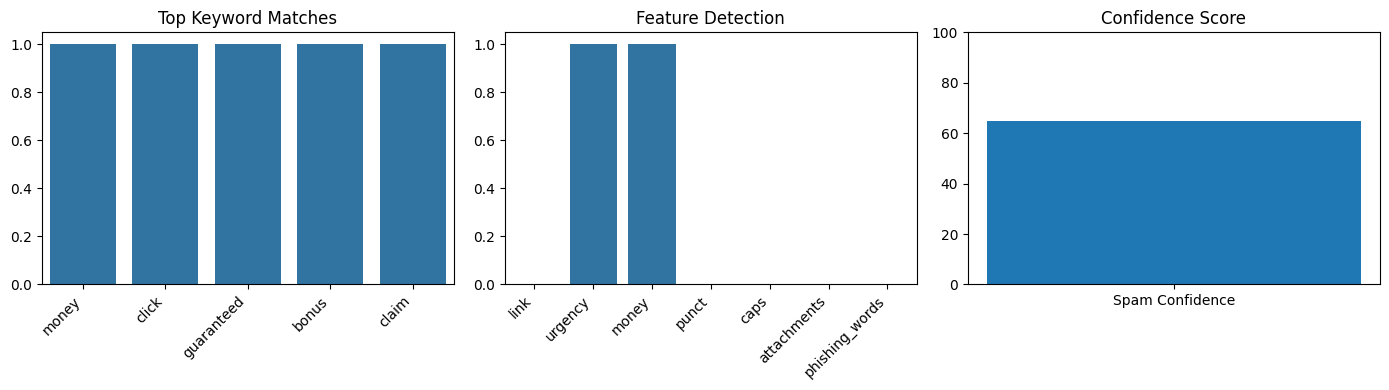


EMAIL SPAM DETECTION SYSTEM
1. Paste email text
2. Upload email (.txt file)
3. Exit
Select option (1/2/3): 2

Upload a .txt email file


Saving SPAM 5.txt to SPAM 5.txt

--- RESULT #2 ---
Verdict       : 🚨 SPAM
Spam Score    : 85/100
CUDA Time     : 0.26 ms
OpenMP Time   : 1.53 ms
Serial Time   : 0.84 ms
CUDA Speedup  : 3.23x
OpenMP Speedup: 0.55x


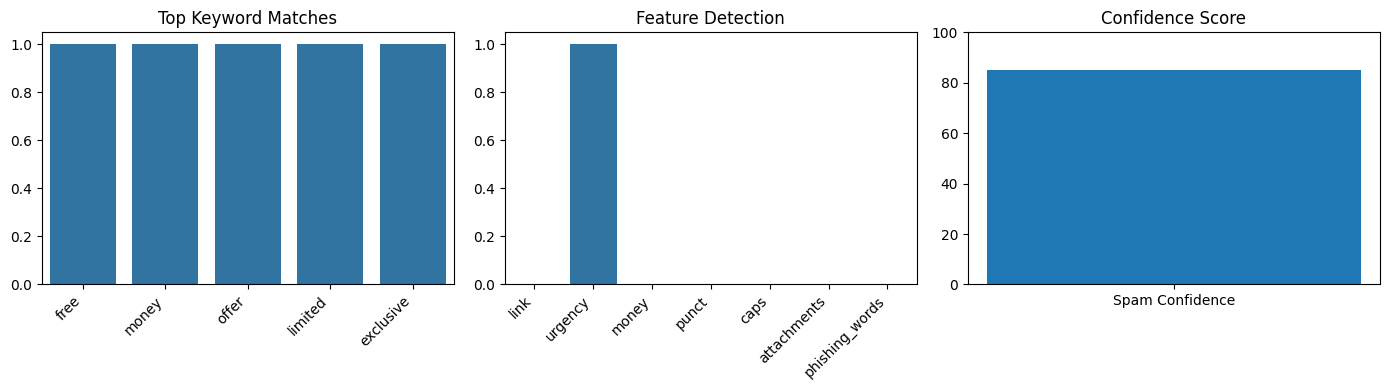


EMAIL SPAM DETECTION SYSTEM
1. Paste email text
2. Upload email (.txt file)
3. Exit
Select option (1/2/3): 2

Upload a .txt email file


In [ ]:

  run_system()